### Step O : Loading libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

In [48]:
#loading required dataset
df = pd.read_csv("dataset_clients_orange.csv")

#verifying dataset was properly loaded
df.sample(10)

,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
859,10860,43,Sud-Ouest,postpayé,200,1710,28,2662
434,10435,25,Nord-Ouest,postpayé,260,1106,37,3594
996,10997,64,Littoral,prépayé,111,830,40,1000
128,10129,65,Adamaoua,prépayé,265,1354,33,5504
919,10920,68,Sud-Ouest,prépayé,253,1588,26,1404
515,10516,22,Adamaoua,postpayé,264,1059,24,3873
550,10551,19,Sud-Ouest,postpayé,239,1738,31,7369
601,10602,38,Sud-Ouest,prépayé,407,351,34,4009
117,10118,22,Sud-Ouest,postpayé,237,1135,34,2306
615,10616,49,Nord-Ouest,prépayé,0,964,22,11126


### Step 1 : Exploratory Data Analysis

First, we begin by exploring our data to assess if there are any anomalies in the dataset such as incorrect formats, wrong data type, duplicate columns, wrong values, null values, outliers etc

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   client_id        1000 non-null   int64 
 1   age              1000 non-null   int64 
 2   region           1000 non-null   object
 3   forfait_type     1000 non-null   object
 4   appels_min       1000 non-null   int64 
 5   data_mo          1000 non-null   int64 
 6   sms_envoyes      1000 non-null   int64 
 7   montant_facture  1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


Upon observation of each column, we assess that there are no null values and each column has a properly associated data type. We proceed with verifying if there are any duplicate columns 

In [5]:
sum(df.duplicated())

0

No duplicated rows as well are present

In [6]:
df.describe()

,client_id,age,appels_min,data_mo,sms_envoyes,montant_facture
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10500.500000,43.81900,205.918000,1509.689000,29.842000,5069.027000
std,288.819436,14.99103,97.219179,490.448291,5.453511,2720.937526
min,10001.000000,18.00000,0.000000,0.000000,15.000000,1000.000000
25%,10250.750000,31.00000,138.000000,1179.000000,26.000000,2960.250000
50%,10500.500000,44.00000,205.000000,1501.500000,30.000000,4973.500000
75%,10750.250000,56.00000,268.250000,1841.500000,33.000000,6977.250000
max,11000.000000,69.00000,463.000000,3096.000000,49.000000,14338.000000


When we skim over the statistics of the numerical column, we do not observe any abnormal values such as negative numbers in the columns nor out of range ages (e.g a maximum age of 500 years). Withour dataset relatively clean, let's proceed to deriving some descriptive statistics

### Step 2: Descriptive Statistics

#### Categorical value exploration
let's begin by exploring our two categorical coolumns --- Subscription type(forfait_type) and Region(region)

In [49]:
#calculating distribution of subscription type
print("Frequency counts for subscription type")
df['forfait_type'].value_counts()

Frequency counts for subscription type


forfait_type
prépayé     704
postpayé    296
Name: count, dtype: int64

In [50]:
#calculating client count per region
print("Frequency counts by region")
df['region'].value_counts()

Frequency counts by region


region
Adamaoua      212
Sud-Ouest     208
Nord-Ouest    206
Littoral      196
Centre        178
Name: count, dtype: int64

We observe that most clients tend to prefer prepaid over post-paid subsrciptions. We proceed to further investigate the distribution of each subscription per region

Subscription Type Distribution by Region:
forfait_type  postpayé  prépayé   All
region                               
Adamaoua            72      140   212
Centre              55      123   178
Littoral            52      144   196
Nord-Ouest          55      151   206
Sud-Ouest           62      146   208
All                296      704  1000


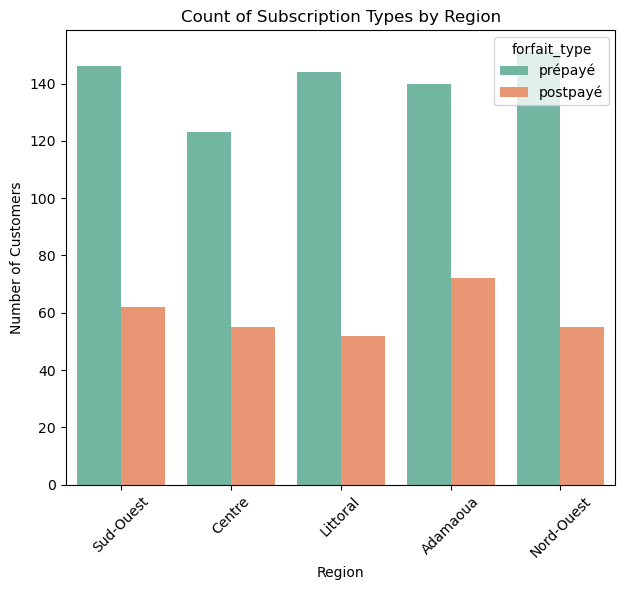

In [23]:
# Creating a cross-tabulation of subscription types by region
subscription_by_region = pd.crosstab(df['region'], df['forfait_type'], margins=True)
print("Subscription Type Distribution by Region:")
print(subscription_by_region)

#visualising plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='region', hue='forfait_type', palette='Set2')
plt.title('Count of Subscription Types by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In as much as Adamawa has the highest count of users, when it comes to prepaid users, North-West users are slightly more numerous, followed by south west, and Litorral before Adamawa. The centre region comes in last. let's explore this distribution in terms of percentages to better assess the ratio of acceptance of each subscription type


Percentage Distribution by Region:
forfait_type  postpayé  prépayé
region                         
Adamaoua         33.96    66.04
Centre           30.90    69.10
Littoral         26.53    73.47
Nord-Ouest       26.70    73.30
Sud-Ouest        29.81    70.19


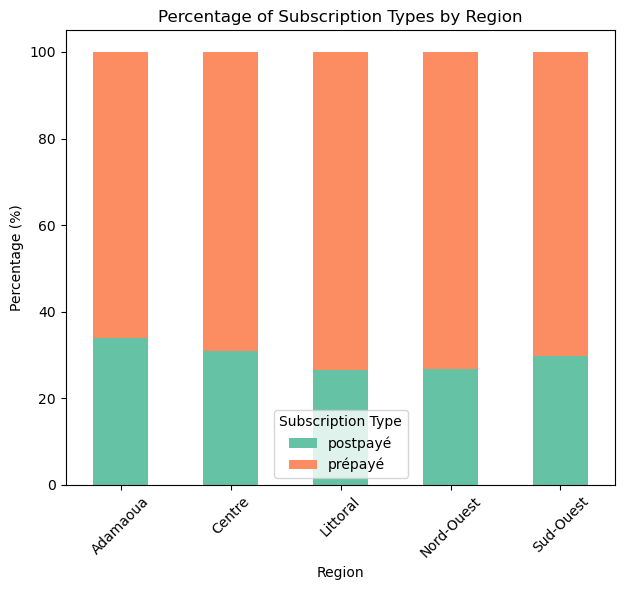

In [51]:
# Calculating percentages
subscription_percent = pd.crosstab(df['region'], df['forfait_type'], normalize='index') * 100
print("\nPercentage Distribution by Region:")
print(subscription_percent.round(2))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
subscription_percent.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], ax=plt.gca())
plt.title('Percentage of Subscription Types by Region')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')

plt.tight_layout()
plt.show()

Interestingly we note that when viewing the distribution in terms of ratio/percentage, Littoral, North west and South west infact make up the greater percentages for prepaid consumers, with Adamawa coming in last. Let's explore the distribution of services globally first, then by region

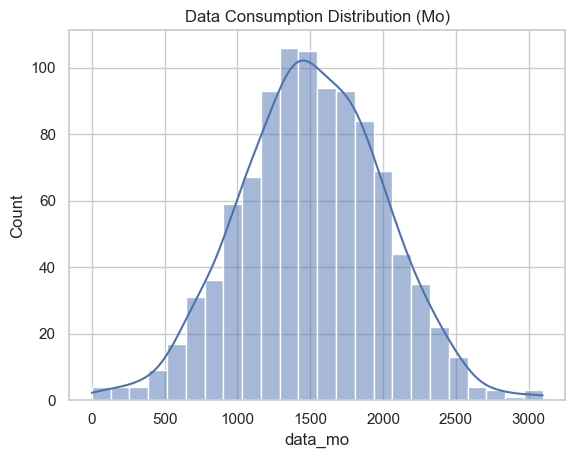

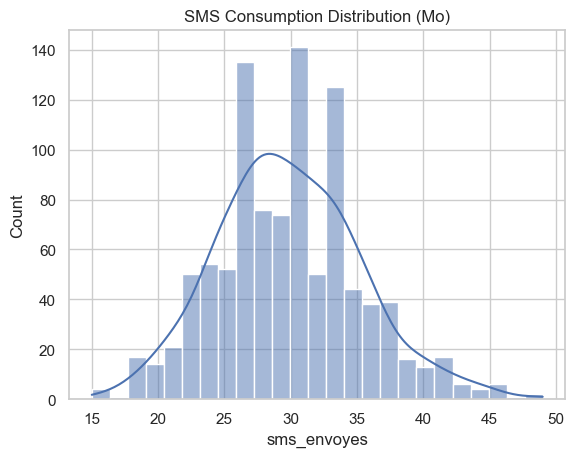

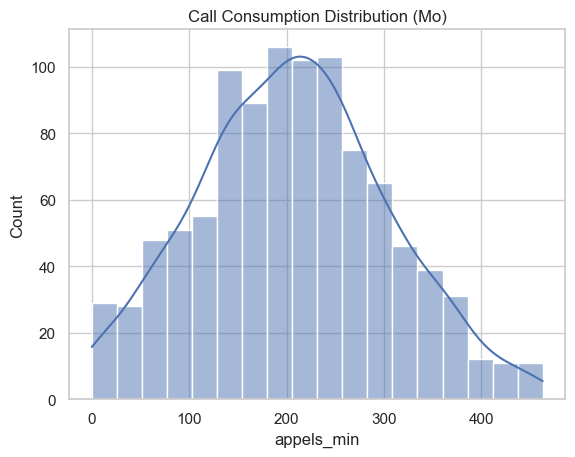

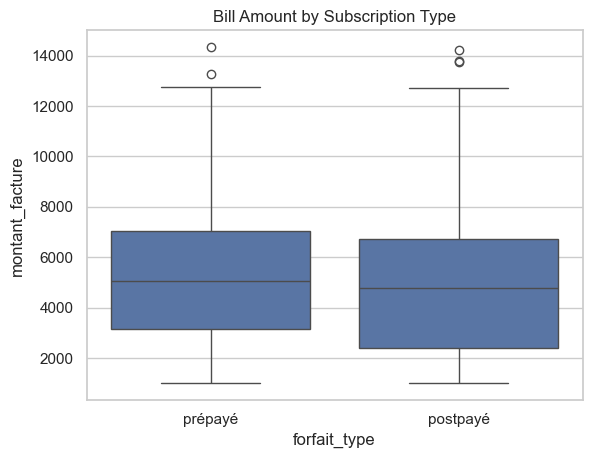

In [83]:
sns.histplot(df['data_mo'], kde=True)
plt.title("Data Consumption Distribution (Mo)")
plt.show()

sns.histplot(df['sms_envoyes'], kde=True)
plt.title("SMS Consumption Distribution (Mo)")
plt.show()

sns.histplot(df['appels_min'], kde=True)
plt.title("Call Consumption Distribution (Mo)")
plt.show()


sns.boxplot(x='forfait_type', y='montant_facture', data=df)
plt.title("Bill Amount by Subscription Type")
plt.show()

We observe from our boxplot that prepaid services tend to yield a higher revenue than postpaid. Additionally, prepaid service has a wider distribution (wider user range) than postpaid, which confirms our previous statistics when we investigated postpaid vs prepaid by region. Let's dive even deeper and observe how the different clients accross each region consume the different services (calls, sms and data)

<Figure size 700x500 with 0 Axes>

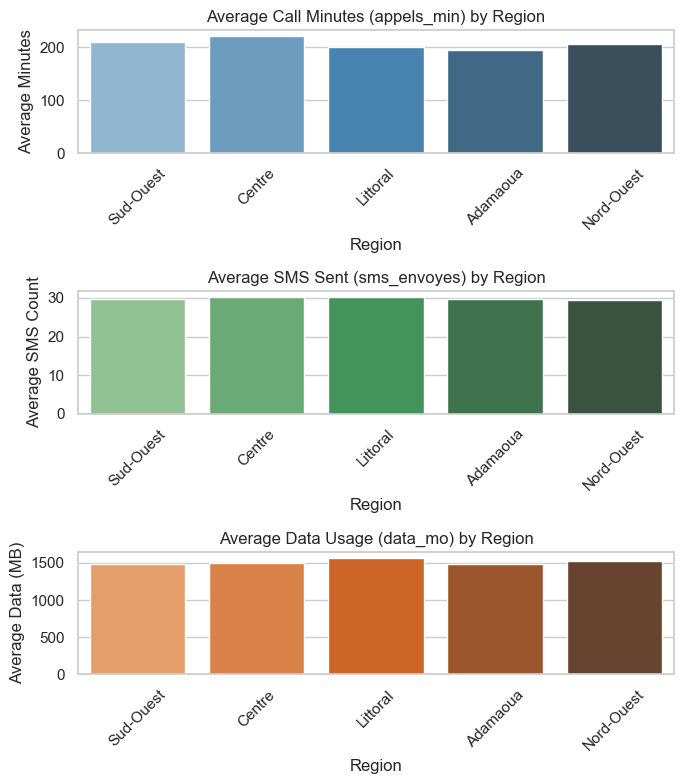

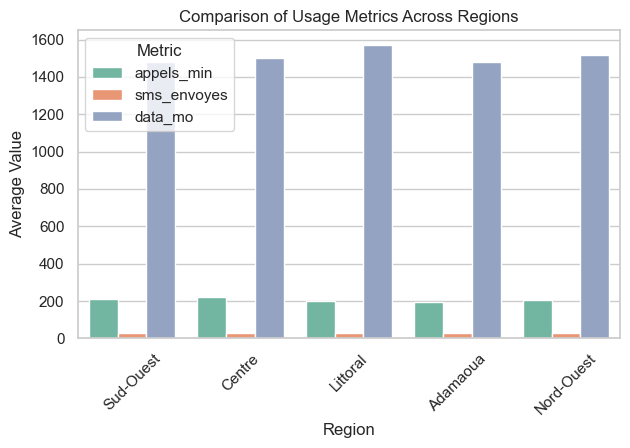

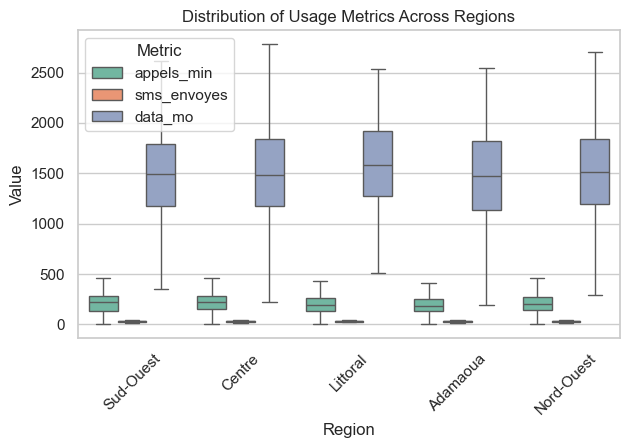


Usage Statistics by Region:
            appels_min                    sms_envoyes                   \
                  mean median         std        mean median       std   
region                                                                   
Adamaoua    195.250000  186.0   94.720986   29.768868   29.0  5.438878   
Centre      220.404494  220.5   93.229468   30.258427   30.0  5.771600   
Littoral    199.923469  194.0   96.736222   30.132653   30.0  5.140364   
Nord-Ouest  206.480583  203.5   99.857201   29.509709   29.5  5.646272   
Sud-Ouest   209.485577  218.0  100.009612   29.615385   29.0  5.294802   

                data_mo                      
                   mean  median         std  
region                                       
Adamaoua    1479.334906  1470.5  520.815043  
Centre      1502.702247  1487.5  483.635603  
Littoral    1570.372449  1582.0  454.724069  
Nord-Ouest  1518.315534  1509.5  473.443929  
Sud-Ouest   1480.879808  1492.5  512.073742  


In [80]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))

# Creating subplots for each metric
fig, axes = plt.subplots(3, 1, figsize=(7, 8))

# Call minutes by region
sns.barplot(data=df, x='region', y='appels_min', estimator='mean', ci=None, 
            palette='Blues_d', ax=axes[0])
axes[0].set_title('Average Call Minutes (appels_min) by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Minutes')
axes[0].tick_params(axis='x', rotation=45)

# SMS sent by region
sns.barplot(data=df, x='region', y='sms_envoyes', estimator='mean', ci=None, 
            palette='Greens_d', ax=axes[1])
axes[1].set_title('Average SMS Sent (sms_envoyes) by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average SMS Count')
axes[1].tick_params(axis='x', rotation=45)

# Data usage by region
sns.barplot(data=df, x='region', y='data_mo', estimator='mean', ci=None, 
            palette='Oranges_d', ax=axes[2])
axes[2].set_title('Average Data Usage (data_mo) by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Average Data (MB)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Combining visualization using melted data
melted_df = df.melt(id_vars=['region'], 
                    value_vars=['appels_min', 'sms_envoyes', 'data_mo'],
                    var_name='metric', 
                    value_name='value')

plt.figure(figsize=(7, 4))
sns.barplot(data=melted_df, x='region', y='value', hue='metric', 
            estimator='mean', ci=None, palette='Set2')
plt.title('Comparison of Usage Metrics Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

# Boxplot version to show distributions
plt.figure(figsize=(7, 4))
sns.boxplot(data=melted_df, x='region', y='value', hue='metric', 
            palette='Set2', showfliers=False)
plt.title('Distribution of Usage Metrics Across Regions')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

# Statistical summary by region
print("\nUsage Statistics by Region:")
usage_stats = df.groupby('region')[['appels_min', 'sms_envoyes', 'data_mo']].agg(['mean', 'median', 'std'])
print(usage_stats)

Even though, as initially found, Adamawa has the highest number of users overall, this region does not stand as highest consumer for any of the services. This could suggest though adamawa has a high number of orange users, their level of consumption is comparatively low ....and marketing teams could instead focus elsewhere as more users in other regions like north west and littoral would better increase service usage. let's investigate the revenue pattern accross these regions 

Revenue Statistics by Region:
               mean      sum   min    max
region                                   
Adamaoua    4661.68   988276  1000  14338
Centre      5349.88   952279  1000  12618
Littoral    5232.43  1025557  1000  13265
Nord-Ouest  4985.53  1027019  1000  12763
Sud-Ouest   5172.58  1075896  1000  14230


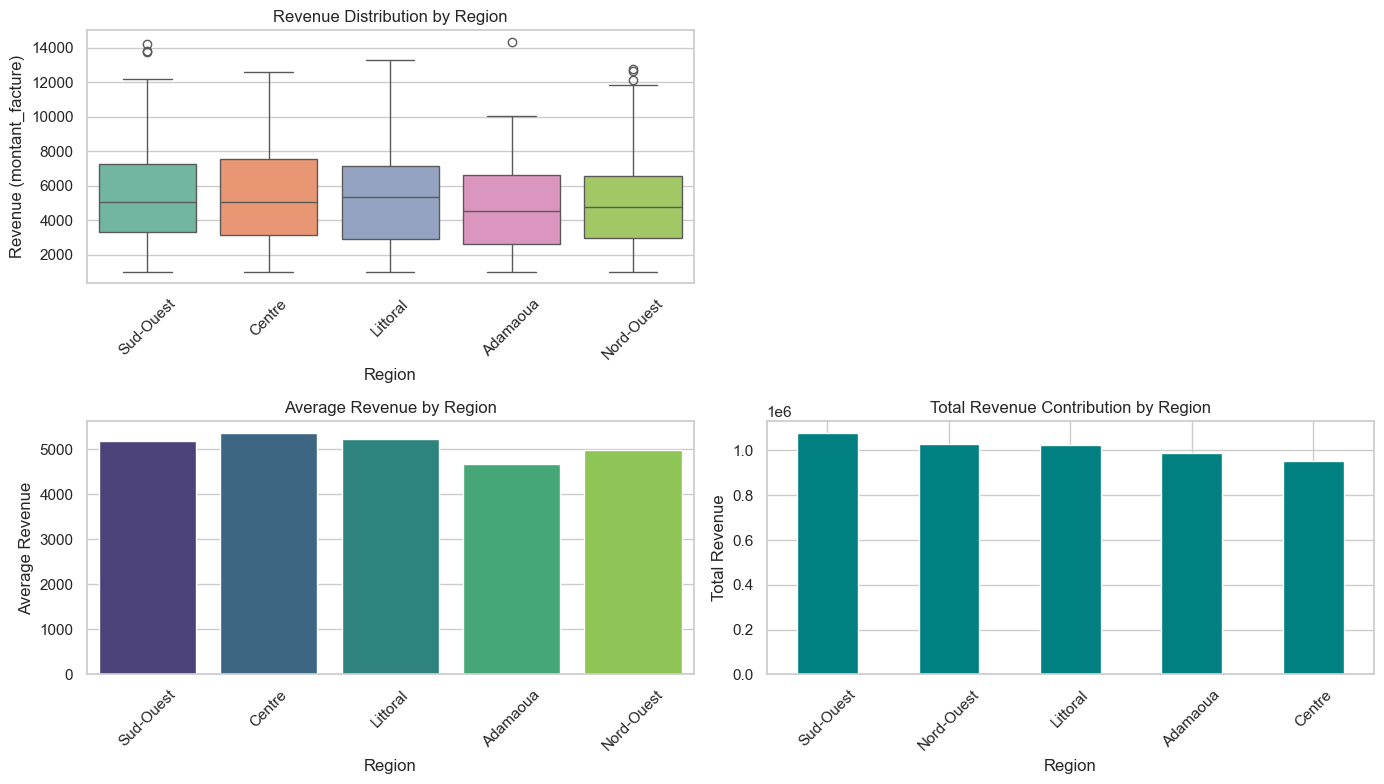

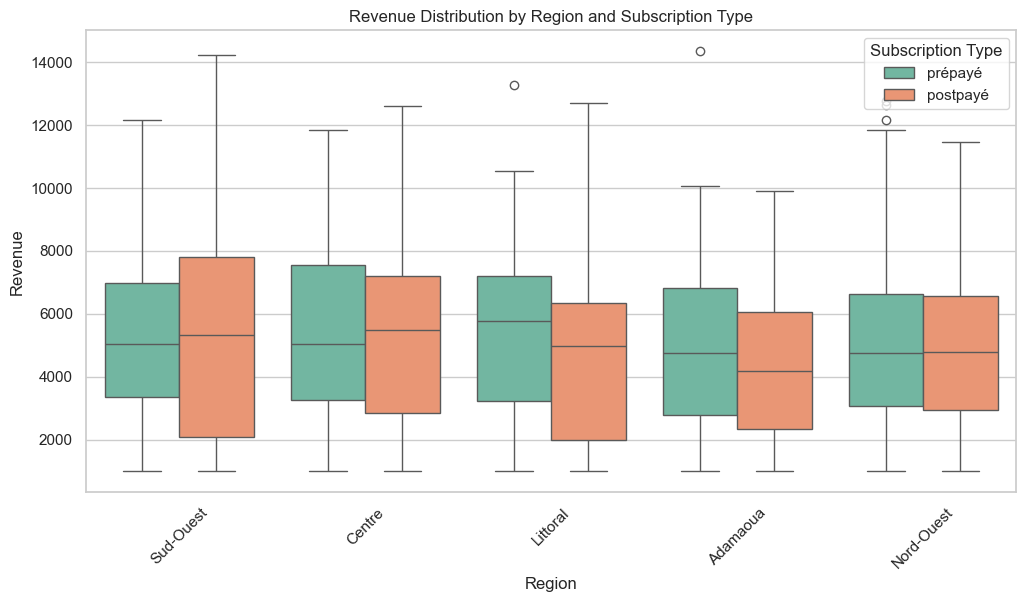

In [85]:
# Basic Revenue Statistics by Region
revenue_stats = df.groupby('region')['montant_facture'].agg(['mean', 'sum', 'min', 'max'])
print("Revenue Statistics by Region:")
print(revenue_stats.round(2))

# Revenue Distribution by Region
plt.figure(figsize=(14, 8))

# Boxplot to show distribution
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='region', y='montant_facture', palette='Set2')
plt.title('Revenue Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (montant_facture)')
plt.xticks(rotation=45)

# Mean revenue comparison
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='region', y='montant_facture', estimator='mean', ci=None, palette='viridis')
plt.title('Average Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Cumulative revenue by region
plt.subplot(2, 2, 4)
region_revenue = df.groupby('region')['montant_facture'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', color='teal')
plt.title('Total Revenue Contribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Revenue by Region and Subscription Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='montant_facture', hue='forfait_type', palette='Set2')
plt.title('Revenue Distribution by Region and Subscription Type')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.legend(title='Subscription Type')
plt.xticks(rotation=45)
plt.show()





From the different plots, we observe that Ssouthwest is relatively high in value, both in total and average revenue, implying the contribute most to Orange's revenue when all services are considered.
Littoral has a rather high variability in revenue (wide IQR and outliers). Despite being lowest in client count as earlier investigated, Centre has a high average revenue but unfortunately contributes least to total revenue. Adamawa is both lower in average and total revenue, despite having the highest number of users. This could suggest that users are not very much indulging in orange services despite being users and could become a potential growth target

In [70]:
#Revenue vs Usage Metrics Correlation by Region
usage_metrics = ['appels_min', 'sms_envoyes', 'data_mo']
print("\nCorrelation Between Revenue and Usage Metrics by Region:")

for region in df['region'].unique():
    region_df = df[df['region'] == region]
    corrs = region_df[['montant_facture'] + usage_metrics].corr().iloc[0, 1:]
    print(f"\n{region}:")
    print(corrs.round(3))


Correlation Between Revenue and Usage Metrics by Region:

Sud-Ouest:
appels_min     0.024
sms_envoyes   -0.018
data_mo       -0.067
Name: montant_facture, dtype: float64

Centre:
appels_min     0.068
sms_envoyes    0.112
data_mo        0.003
Name: montant_facture, dtype: float64

Littoral:
appels_min    -0.003
sms_envoyes    0.056
data_mo        0.012
Name: montant_facture, dtype: float64

Adamaoua:
appels_min     0.025
sms_envoyes   -0.036
data_mo       -0.048
Name: montant_facture, dtype: float64

Nord-Ouest:
appels_min    -0.093
sms_envoyes   -0.175
data_mo        0.037
Name: montant_facture, dtype: float64


Let's investigate age distribution in orange users

In [60]:
# Age distribution analysis
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
print("\nAge Group Distribution:")
print(df['age_group'].value_counts().sort_index())


Age Group Distribution:
age_group
18-24    130
25-34    173
35-44    208
45-54    201
55-64    179
65+       85
Name: count, dtype: int64


As per our dataset, majority of orange clients are within the age range of 35 to 44, closely followed by the 45 to 54 range; indicating that most users are rather elderly people within the range 35 to 54. We proceed to investigate which group consumes more..... Though the higher clientele is found within the 35 to 54 group, it is possible they may not consume as much as the other groups do.


Bill Amount Statistics by Age Group:
                  mean      sum
age_group                      
18-24      4988.807692   648545
25-34      5139.520231   889137
35-44      5158.355769  1072938
45-54      4997.741294  1004546
55-64      4901.921788   877444
65+        5420.705882   460760


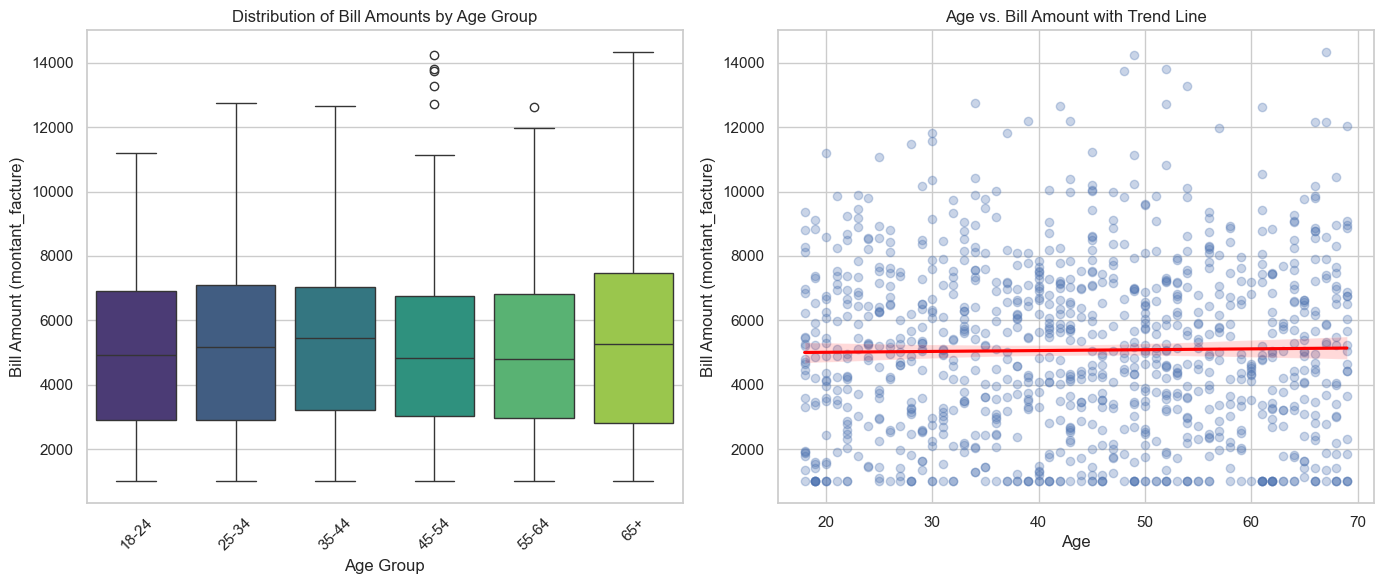


Pearson Correlation between Age and Bill Amount: 0.015


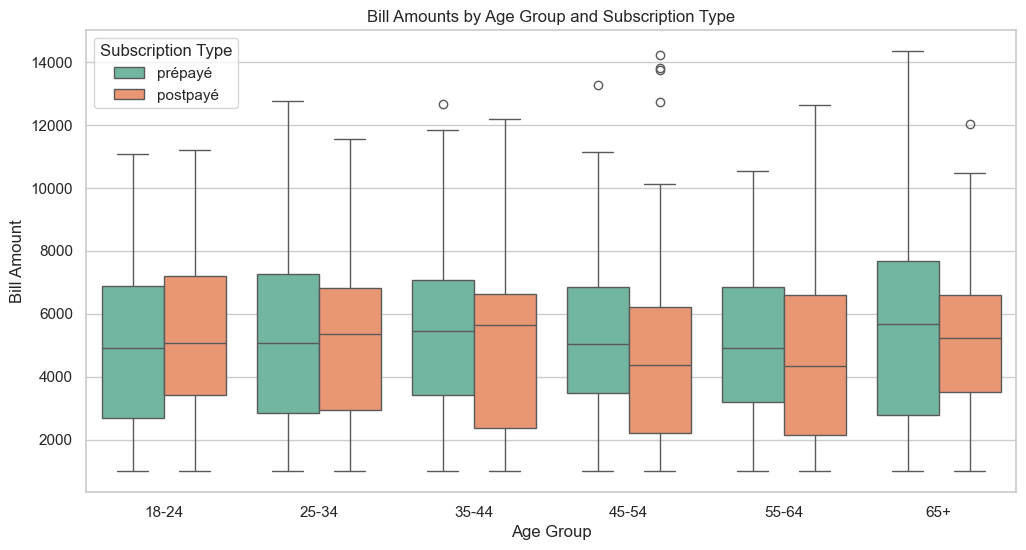

In [86]:
# stats by age group
age_stats = df.groupby('age_group')['montant_facture'].agg(['mean', 'sum'])
print("Bill Amount Statistics by Age Group:")
print(age_stats)

#visualising this distribution
plt.figure(figsize=(14, 6))

# Boxplot of bill amounts by age group
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='age_group', y='montant_facture', palette='viridis')
plt.title('Distribution of Bill Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Bill Amount (montant_facture)')
plt.xticks(rotation=45)

# Scatter plot with regression line
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='age', y='montant_facture', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Age vs. Bill Amount with Trend Line')
plt.xlabel('Age')
plt.ylabel('Bill Amount (montant_facture)')

plt.tight_layout()
plt.show()

#Correlation analysis
correlation = df['age'].corr(df['montant_facture'])
print(f"\nPearson Correlation between Age and Bill Amount: {correlation:.3f}")


#Breakdown by subscription type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age_group', y='montant_facture', hue='forfait_type', palette='Set2')
plt.title('Bill Amounts by Age Group and Subscription Type')
plt.xlabel('Age Group')
plt.ylabel('Bill Amount')
plt.legend(title='Subscription Type')
plt.show()

### Step 2: Segmentation Analysis

In other to better understand our client repartition and how to better assess and target each existing client group, we shall perform a segmentation analysis. This segmentation will be done based on behaviour (how the different services are used), based on demography(client loaction and characteristics such as age) and based on value(how much their consumption yields in revenue)

In [74]:
df['age_group'] = pd.cut(df['age'], 
                         bins=[18, 25, 35, 45, 55, 65, 100], 
                         labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# 1. Demographic Segmentation
print("Demographic Segmentation Summary:")
demo_segments = df.groupby(['region', 'age_group', 'forfait_type']).agg(
    count=('client_id', 'count'),
    avg_revenue=('montant_facture', 'mean'),
    avg_data=('data_mo', 'mean'),
    avg_calls=('appels_min', 'mean')
).round(2).sort_values('avg_revenue', ascending=False)

print(demo_segments.head(10))



Demographic Segmentation Summary:
                                   count  avg_revenue  avg_data  avg_calls
region     age_group forfait_type                                         
Centre     25-34     postpayé          5      6946.80   1451.40     217.00
           55-64     postpayé         13      6374.69   1553.15     214.77
Sud-Ouest  35-44     postpayé         11      6259.91   1718.91     162.91
Littoral   65+       postpayé          6      6136.83   1425.83     157.50
Nord-Ouest 35-44     postpayé         11      6069.27   1404.55     202.09
Centre     45-54     prépayé          21      6050.43   1385.90     215.43
Sud-Ouest  65+       postpayé          2      6044.00   1279.50     131.00
Centre     25-34     prépayé          21      5997.81   1409.95     230.05
Sud-Ouest  45-54     postpayé         18      5944.06   1527.72     191.89
Littoral   25-34     prépayé          33      5816.91   1664.42     209.52


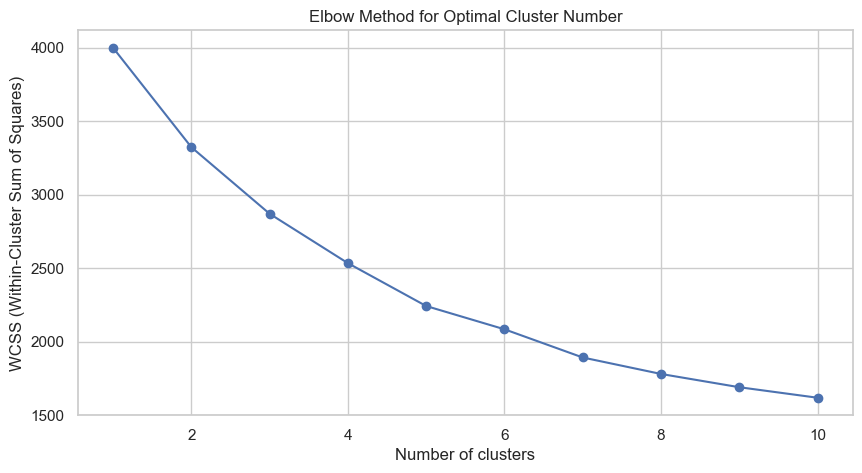


Behavioral Segments:
                 appels_min       sms_envoyes        data_mo        \
                       mean count        mean count     mean count   
behavior_cluster                                                     
0                    151.86   248       32.61   248  1973.77   248   
1                    173.17   241       28.05   241  1319.15   241   
2                    209.68   254       32.61   254  1080.63   254   
3                    285.08   257       26.11   257  1664.59   257   

                 montant_facture        
                            mean count  
behavior_cluster                        
0                        4603.07   248  
1                        8121.02   241  
2                        3258.14   254  
3                        4446.42   257  


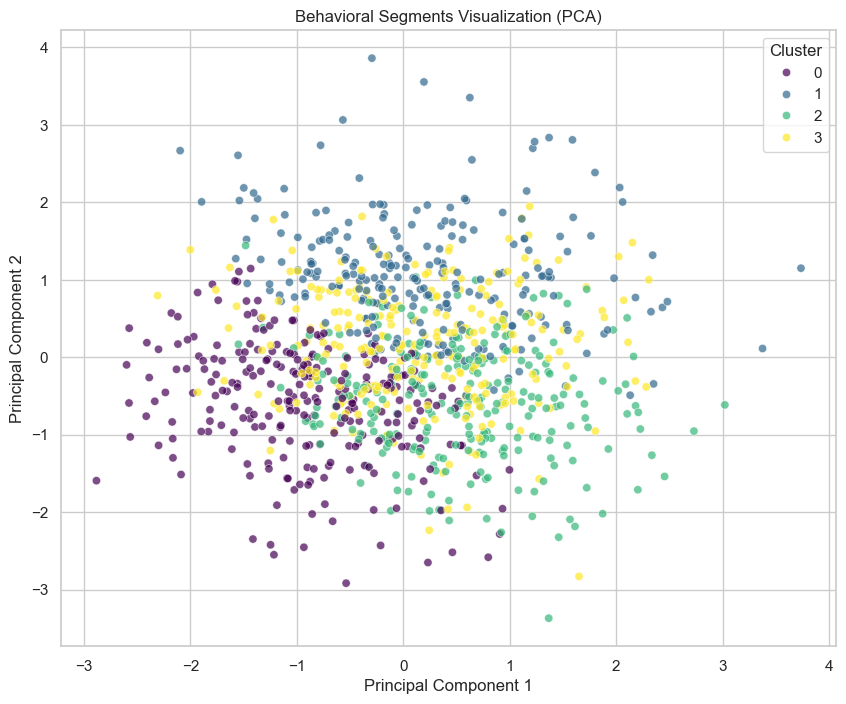

In [75]:
# 2. Behavioral Segmentation (Usage Patterns)
usage_features = ['appels_min', 'sms_envoyes', 'data_mo', 'montant_facture']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[usage_features])

# Determine optimal clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Apply K-means clustering (using 4 clusters based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['behavior_cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster characteristics
behavior_segments = df.groupby('behavior_cluster')[usage_features].agg(['mean', 'count']).round(2)
print("\nBehavioral Segments:")
print(behavior_segments)

# Visualize clusters with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['pca1'] = principal_components[:, 0]
df['pca2'] = principal_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='behavior_cluster', palette='viridis', alpha=0.7)
plt.title('Behavioral Segments Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()



A PCA (Principal Component Analysis) visualization was used to project and interpret customer clusters derived from K-Means clustering based on monetary value and usage. Here, Four behavioral clusters were identified:

Cluster 0: Densely grouped, lower-spending customers.

Cluster 1 & 2: Centralized clusters representing medium-value customers with balanced usage.

Cluster 3: A more dispersed group, indicating high-variance or potentially high-value customers with diverse behavior.


From our clusters, we observe that regions such as Adamaoua and Centre may benefit from targeted marketing and customer acquisition strategies to increase both transaction volume(that is more calls made, sms sent and data used) and value.

In [76]:
# Value-Based Segmentation 
#focus on monetary and usage
value_segments = pd.qcut(df['montant_facture'], q=3, labels=['Low', 'Medium', 'High'])
df['value_segment'] = value_segments

# Combine with usage
value_usage_segments = df.groupby(['value_segment', 'forfait_type']).agg(
    count=('client_id', 'count'),
    avg_data=('data_mo', 'mean'),
    avg_calls=('appels_min', 'mean'),
    avg_sms=('sms_envoyes', 'mean')
).round(2).sort_values('value_segment', ascending=False)

print("\nValue-Based Segments:")
print(value_usage_segments)




Value-Based Segments:
                            count  avg_data  avg_calls  avg_sms
value_segment forfait_type                                     
High          postpayé         94   1538.93     202.69    29.37
              prépayé         240   1456.33     208.51    30.00
Medium        postpayé         92   1611.13     202.66    30.14
              prépayé         240   1526.06     204.58    29.60
Low           postpayé        110   1574.98     202.05    29.60
              prépayé         224   1463.33     209.16    30.12


Based on value(combinatiom of services used and revenue), we identify three main segments High value users, low value users and medium value users. Let's proceed to have a global view of all the repartition of our segments...that is, each cluster and segment identified

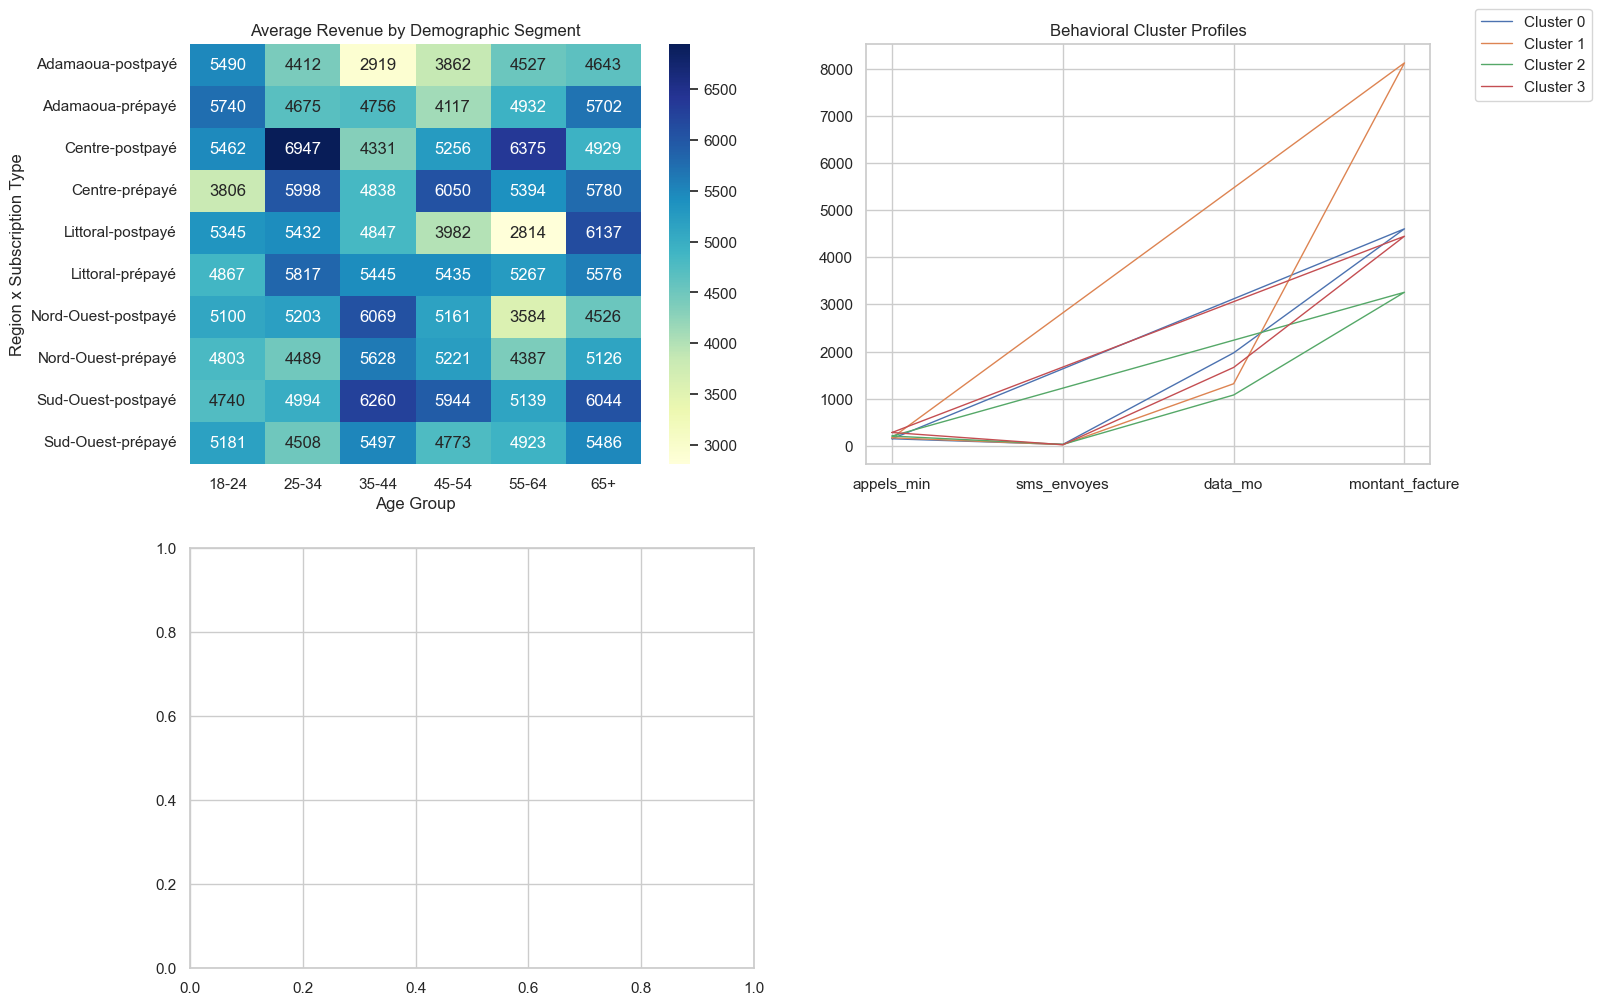

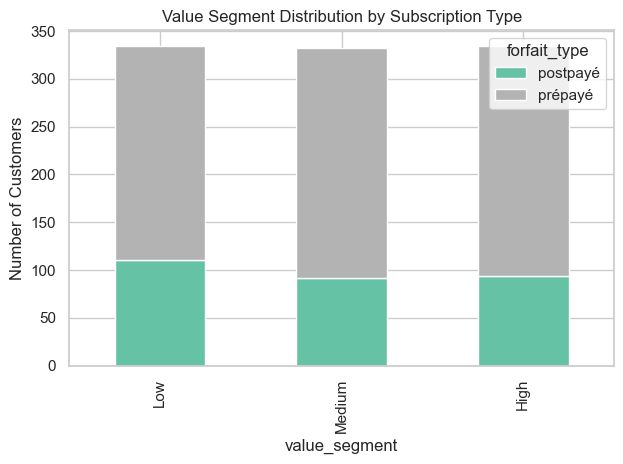

In [88]:
#Segmentation Visualization
plt.figure(figsize=(16, 12))

# Demographic heatmap
plt.subplot(2, 2, 1)
demo_pivot = demo_segments.reset_index().pivot_table(
    index=['region', 'forfait_type'], 
    columns='age_group', 
    values='avg_revenue'
)
sns.heatmap(demo_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Revenue by Demographic Segment')
plt.xlabel('Age Group')
plt.ylabel('Region x Subscription Type')

# Behavioral radar chart
plt.subplot(2, 2, 2)
cluster_means = df.groupby('behavior_cluster')[usage_features].mean()
categories = list(cluster_means.columns)
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].values.tolist()
    values += values[:1]
    plt.polar(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster}')

plt.xticks(angles[:-1], categories)
plt.title('Behavioral Cluster Profiles')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Value segment distribution
plt.subplot(2, 2, 3)
value_counts = df.groupby(['value_segment', 'forfait_type']).size().unstack()
value_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Value Segment Distribution by Subscription Type')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()



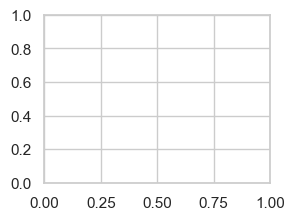

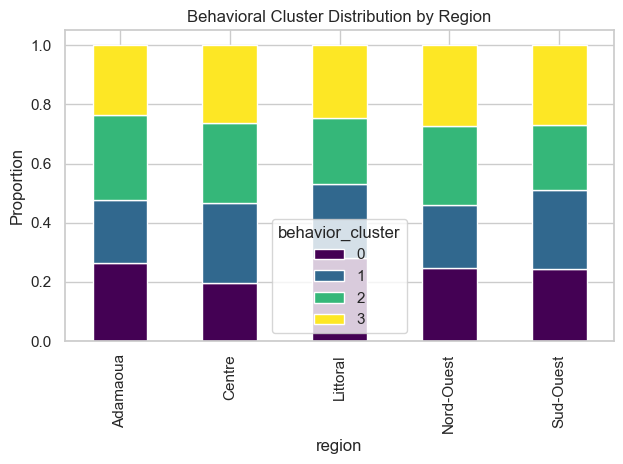

In [89]:
# Region-cluster relationship
plt.subplot(2, 2, 4)
region_cluster = pd.crosstab(df['region'], df['behavior_cluster'], normalize='index')
region_cluster.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Behavioral Cluster Distribution by Region')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


In [79]:
# Segment Profiles Summary
print("\nKey Segment Profiles:")

# High-Value Postpaid Adults
high_value = df[(df['value_segment'] == 'High') & (df['forfait_type'] == 'postpayé')]
print("\nHigh-Value Postpaid Adults:")
print(high_value[['age', 'region', 'montant_facture', 'data_mo']].describe().round(2))

# Low-Usage Prepaid Youth
low_usage = df[(df['behavior_cluster'] == 0) & (df['age_group'].isin(['18-24', '25-34']))]
print("\nLow-Usage Prepaid Youth:")
print(low_usage[['age', 'region', 'montant_facture', 'data_mo']].describe().round(2))

# Data-Heavy Users
data_heavy = df[df['behavior_cluster'] == 2]  # Assuming cluster 2 is data-heavy
print("\nData-Heavy Users:")
print(data_heavy[['age', 'region', 'montant_facture', 'data_mo']].describe().round(2))


Key Segment Profiles:

High-Value Postpaid Adults:
         age  montant_facture  data_mo
count  94.00            94.00    94.00
mean   41.97          8478.11  1538.93
std    15.34          1978.14   474.21
min    18.00          6275.00   553.00
25%    29.00          6829.75  1199.25
50%    42.50          8141.00  1518.00
75%    53.00          9721.00  1847.00
max    69.00         14230.00  3068.00

Low-Usage Prepaid Youth:
         age  montant_facture  data_mo
count  70.00            70.00    70.00
mean   27.29          4638.46  1977.53
std     5.23          2066.15   299.36
min    19.00          1000.00  1415.00
25%    22.00          3163.00  1750.75
50%    28.00          4914.50  1958.00
75%    32.00          6019.50  2159.50
max    35.00          9325.00  3068.00

Data-Heavy Users:
          age  montant_facture  data_mo
count  254.00           254.00   254.00
mean    44.68          3258.14  1080.63
std     14.93          1907.41   329.85
min     18.00          1000.00    29.00
2

#### Conclusively, the Key Client Segments Identified include:
1.  Demographic Segments:

- High-revenue older postpaid customers in South west and Littoral

- Young prepaid customers with lower revenue but high potential

- Middle-aged professionals with balanced usage

2. Behavioral Segments:

- Cluster 0: Low-usage customers (minimal calls, SMS, and data)

- Cluster 1: Voice-focused users (high call minutes)

- Cluster 2: Data-heavy users (high data consumption)

- Cluster 3: Balanced users (moderate usage across all services)

3. Value-Based Segments:

- High Value: Top 33% by revenue, often postpaid

- Medium Value: Middle 33% by revenue

- Low Value: Bottom 33% by revenue, mostly prepaid



### Step 3: Strategic Recommendations
1. For High-Value Segments:
- Develop retention programs with premium services

- Offer bundled packages with enhanced data/calling features

- Personalize loyalty rewards

2. For Young Prepaid Segments:

- Targeted youth-oriented packages

- Social media-focused marketing

- Upsell opportunities to postpaid as they mature

3. For Data-Heavy Users:

- Promote unlimited/high-cap data plans

- Offer device bundles or streaming partnerships

- Network optimization in regions with many data-heavy users

4. For Low-Usage Customers:

- Reactivation campaigns

- Low-cost entry plans to maintain market presence

- Investigate reasons for low engagement